# Working with `sklearn` Ridge

In [1]:
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt
import numpy as np

In [2]:
X,y = make_regression(n_samples=100, n_features=1, n_informative=1, n_targets=1,noise=20,random_state=13)

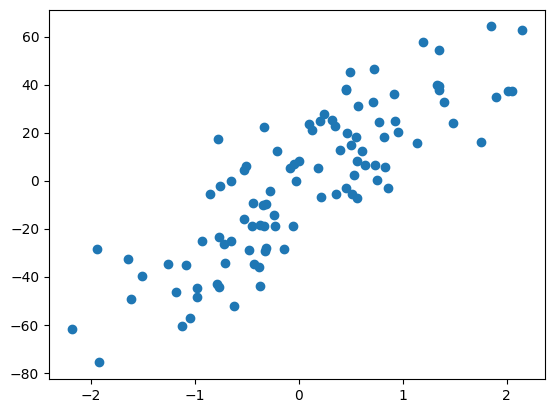

In [3]:
plt.scatter(X,y)

In [4]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge

lr = LinearRegression()
lr.fit(X,y)
print("Coefficient before applying ridge :",lr.coef_)
print("Intercept before applying ridge :",lr.intercept_)

rr = Ridge(alpha=10)
rr.fit(X,y)
print("Coefficient after applying ridge :", rr.coef_)
print("Intercept before applying ridge :", rr.intercept_)



Coefficient before applying ridge : [27.82809103]
Intercept before applying ridge : -2.29474455867698
Coefficient after applying ridge : [24.9546267]
Intercept before applying ridge : -2.1269130035235735


In [5]:
rr1 = Ridge(alpha=100)
rr1.fit(X,y)
print(rr1.coef_)
print(rr1.intercept_)

[12.93442104]
-1.4248441496033308


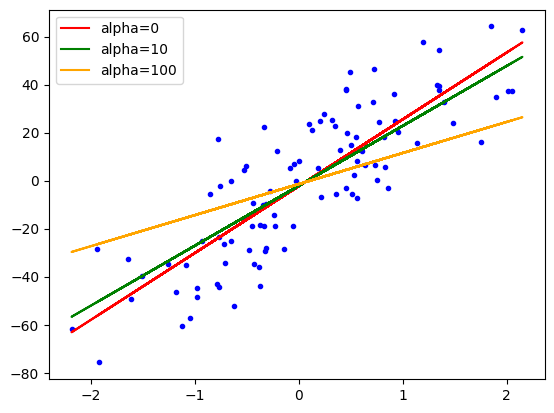

In [6]:
plt.plot(X,y,'b.')
plt.plot(X,lr.predict(X),color='red',label='alpha=0')
plt.plot(X,rr.predict(X),color='green',label='alpha=10')
plt.plot(X,rr1.predict(X),color='orange',label='alpha=100')
plt.legend()

# Implementing `Ridge` with `Simple Linear Regression`

In [9]:
import numpy as np

class SimpleLinearRegression():
    def __init__(self, alpha=0.1):
        self.coefficient = None
        self.intercept = None
        self.alpha = alpha

    def fit(self, X_train, y_train):
        X_mean = np.mean(X_train)
        y_mean = np.mean(y_train)

        self.coefficient  = np.dot((X_train - X_mean).T, y_train - y_mean)/( np.dot((X_train - X_mean).T, X_train - X_mean) + self.alpha)
        self.intercept = y_mean - self.coefficient * X_mean

    def predict(self, X_test):
        return self.coefficient * X_test + self.intercept

In [12]:
slr1 = SimpleLinearRegression(alpha=10)
slr1.fit(X,y)
print(slr1.coefficient)
print(slr1.intercept)

[[24.9546267]]
[[-2.126913]]


In [13]:
slr2 = SimpleLinearRegression(alpha=100)
slr2.fit(X,y)
print(slr2.coefficient)
print(slr2.intercept)

[[12.93442104]]
[[-1.42484415]]


In [14]:
slr = SimpleLinearRegression(alpha=0.0)
slr.fit(X,y)
print(slr.coefficient)
print(slr.intercept)

[[27.82809103]]
[[-2.29474456]]


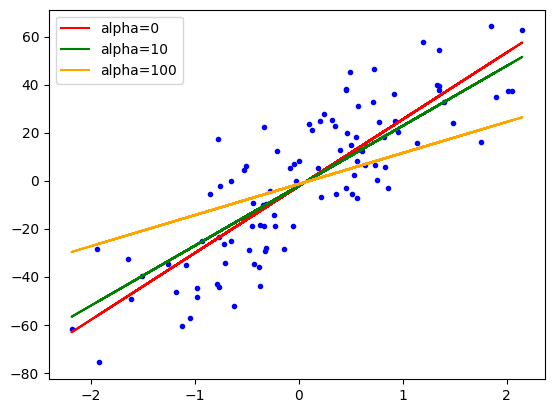

In [15]:
plt.plot(X,y,'b.')
plt.plot(X,slr.predict(X),color='red',label='alpha=0')
plt.plot(X,slr1.predict(X),color='green',label='alpha=10')
plt.plot(X,slr2.predict(X),color='orange',label='alpha=100')
plt.legend()